#### <b>2024's Most-Watched YouTube Videos</b>

Dataset acquired from Kaggle

<!-- https://www.kaggle.com/datasets/kanchana1990/2024s-most-watched-youtube-videos -->

#### Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [3]:
url = kagglehub.dataset_download("kanchana1990/2024s-most-watched-youtube-videos")
urlpath = r'\most_watched_600_youtube_videos_2024.csv'

In [4]:
file = f'{url}{urlpath}'
print(file)

C:\Users\wareh\.cache\kagglehub\datasets\kanchana1990\2024s-most-watched-youtube-videos\versions\1\most_watched_600_youtube_videos_2024.csv


In [5]:
df = pd.read_csv(file)

#### Workspace (clean and preprocess)

In [6]:
display(df.info(),df[:2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          598 non-null    object 
 1   published_at   598 non-null    object 
 2   duration       598 non-null    object 
 3   view_count     598 non-null    int64  
 4   like_count     585 non-null    float64
 5   comment_count  588 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 28.2+ KB


None

,title,published_at,duration,view_count,like_count,comment_count
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27T19:16:13Z,PT25S,39972377,1143891.0,8254.0
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11T14:43:07Z,PT37S,37983493,1239925.0,2823.0


In [7]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['publish_year'] = df['published_at'].dt.to_period('Y')
df['publish_month'] = df['published_at'].dt.to_period('M')

In [8]:
df[['like_count','comment_count']] = df[['like_count','comment_count']].apply(pd.to_numeric, errors='coerce').fillna(0).astype('int64')

In [9]:
time = pd.to_timedelta(df['duration']).dt.components[['hours', 'minutes', 'seconds']]
time['minutes'] = time['minutes'].add(time.pop('hours')*60)
# time[time.index==385]   # 385
time[:3]

,minutes,seconds
0,0,25
1,0,37
2,1,1


In [10]:
df['time'] = time.astype(str).agg(lambda s: ':'.join(s.str.zfill(2)), axis=1)
# df['time'] = time.astype(str).agg(lambda s: ':'.join(s.str.zfill(2)), axis=0)

#### Plot

In [11]:
display(df.info(), df[:3])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   title          598 non-null    object             
 1   published_at   598 non-null    datetime64[ns, UTC]
 2   duration       598 non-null    object             
 3   view_count     598 non-null    int64              
 4   like_count     598 non-null    int64              
 5   comment_count  598 non-null    int64              
 6   publish_year   598 non-null    period[Y-DEC]      
 7   publish_month  598 non-null    period[M]          
 8   time           598 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3), period[M](1), period[Y-DEC](1)
memory usage: 42.2+ KB


None

,title,published_at,duration,view_count,like_count,comment_count,publish_year,publish_month,time
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27 19:16:13+00:00,PT25S,39972377,1143891,8254,2024,2024-01,00:25
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11 14:43:07+00:00,PT37S,37983493,1239925,2823,2024,2024-02,00:37
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24 05:17:00+00:00,PT1M1S,29605580,938530,691,2024,2024-01,01:01


In [12]:
a = 'publish_year'
b = 'publish_month'
c = 'time'
d = 'title'
e = 'view_count'
f = 'like_count'
g = 'comment_count'

dfG_MDVLC = df.groupby([b,c])[[e,f,g]].sum().reset_index().sort_values(by=[e,f,g],ascending=False)
dfG_MTVLC = df.groupby([b,d])[[e,f,g]].sum().reset_index().sort_values(by=[e,f,g,b], ascending=[0,0,0,1])
dfG_MTVLC [:2]

,publish_month,title,view_count,like_count,comment_count
15,2024-01,Se Libró del ATAQUE de un Cocodrilo ❌🐊,39972377,1143891,8254
40,2024-02,#Sareedrapping#pregnancydrapping#babyshower#sh...,37983493,1239925,2823


In [13]:
dfG_DVLC = df.groupby([c])[[e,f,g]].sum().reset_index().sort_values(by=[e,f,g], ascending=False) #[:10]
dfG_DVLC[dfG_DVLC['time']<'01:00'] [:10]

,time,view_count,like_count,comment_count
53,00:58,66901312,2409532,7456
33,00:37,61360185,1283620,3677
54,00:59,52038473,2874107,27131
21,00:25,49939231,1204935,8896
24,00:28,42024087,1762217,9241
51,00:56,40683424,1547318,13325
12,00:16,35330439,1064139,5553
2,00:06,32689602,192562,1139
18,00:22,26607987,1311743,4397
17,00:21,26470233,396807,330


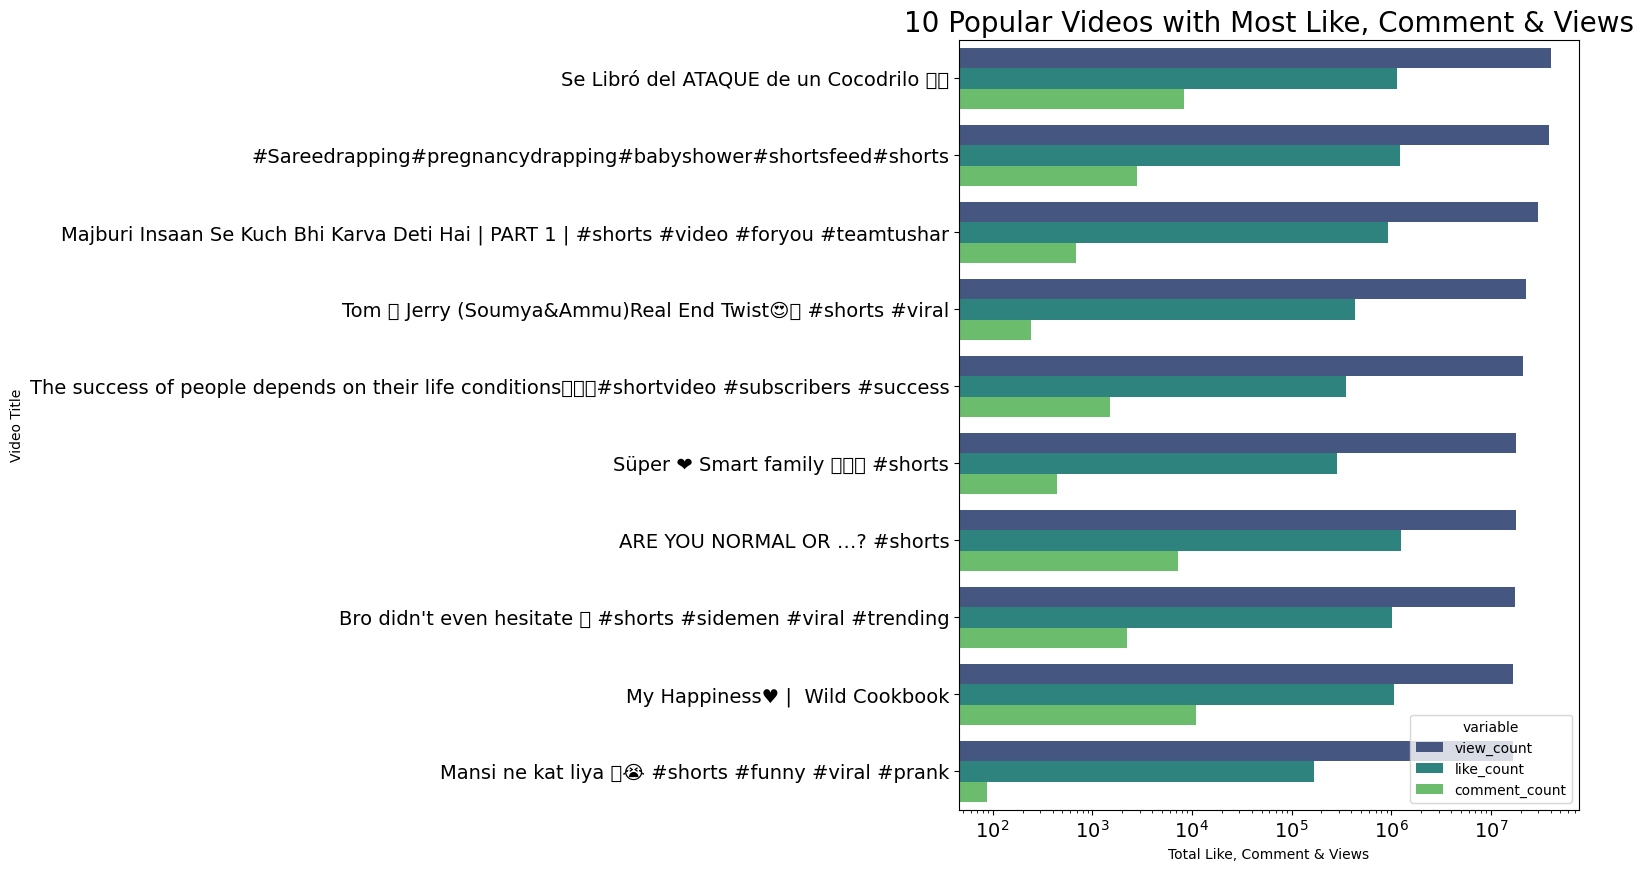

In [14]:
# Barplot of Popular Video
plt.figure(figsize=(8,10))

dfG_DVLC_melt = df.groupby(d)[[e,f,g]].sum().reset_index().sort_values(by=[e,f,g], ascending=False) [:10]
dfG_DVLC_melt = dfG_DVLC_melt.melt(id_vars='title')
sns.barplot(data=dfG_DVLC_melt, x='value', y='title',
            hue='variable', palette='viridis')
plt.title('10 Popular Videos with Most Like, Comment & Views', fontsize=20)
plt.xlabel('Total Like, Comment & Views')
plt.ylabel('Video Title')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.show()

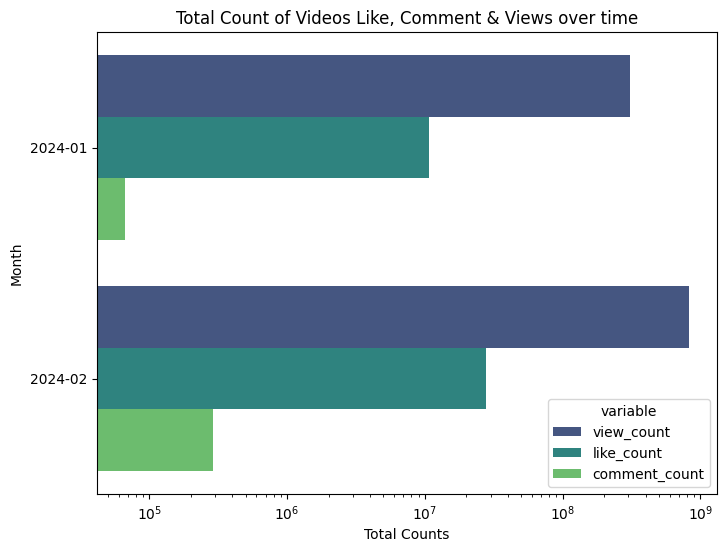

In [15]:
# Barplot of Video Views, Like, Comment each month

plt.figure(figsize=(8,6))
dfG_MVLC_melt = df.groupby(b)[[e,f,g]].sum().reset_index()
dfG_MVLC_melt = dfG_MVLC_melt.melt(id_vars='publish_month')
sns.barplot(data=dfG_MVLC_melt, x='value', y='publish_month',
            hue='variable', palette='viridis')
plt.title('Total Count of Videos Like, Comment & Views over time')
plt.xlabel('Total Counts')
plt.ylabel('Month')
plt.xscale('log')
plt.show()

<Figure size 800x600 with 0 Axes>

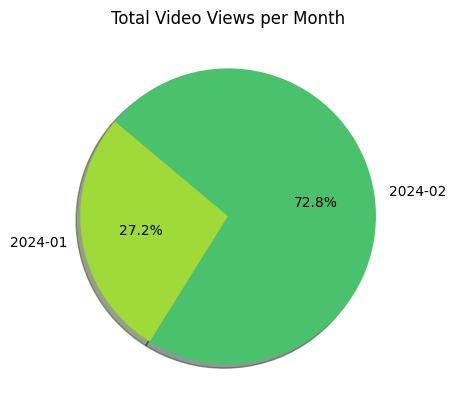

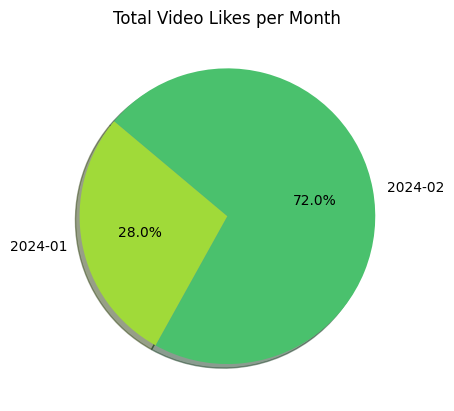

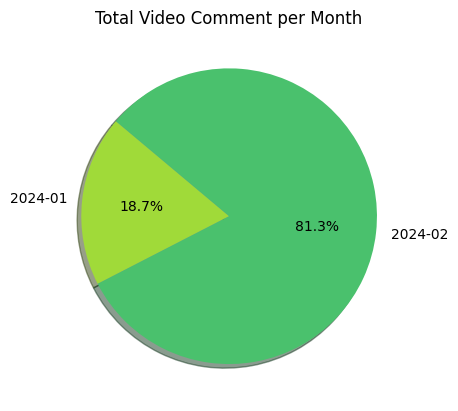

In [16]:
# Piechart Video Views, Like, Comment each month
plt.figure(figsize=(8,6))
dfG_MVLC = df.groupby(b)[[e,f,g]].sum()

plt.subplots(1, 1)
plt.pie(dfG_MVLC['view_count'].values, labels=dfG_MVLC.index,
        autopct='%1.1f%%', startangle=140, shadow=True,
        colors=sns.color_palette('viridis_r'))
plt.title('Total Video Views per Month')

plt.subplots(1, 1)
plt.pie(dfG_MVLC['like_count'].values, labels=dfG_MVLC.index,
        autopct='%1.1f%%', startangle=140, shadow=True,
        colors=sns.color_palette('viridis_r'))
plt.title('Total Video Likes per Month')

plt.subplots(1, 1)
plt.pie(dfG_MVLC['comment_count'].values, labels=dfG_MVLC.index,
        autopct='%1.1f%%', startangle=140, shadow=True,
        colors=sns.color_palette('viridis_r'))
plt.title('Total Video Comment per Month')

plt.show()

In [17]:
title_202401 = dfG_MTVLC.loc[dfG_MTVLC['publish_month']=='2024-01'] [:10]
title_202402 = dfG_MTVLC.loc[dfG_MTVLC['publish_month']=='2024-02'] [:10]
title_2024 = title_202401['title'].unique().tolist() + title_202402['title'].unique().tolist()
# title_2024

In [18]:
dfG_MTVLC_melt = dfG_MTVLC.melt(id_vars=['publish_month','title']).sort_values(by='value', ascending=False)
dfG_MTVLC_melttitle = dfG_MTVLC_melt[dfG_MTVLC_melt['title'].isin(title_2024)]

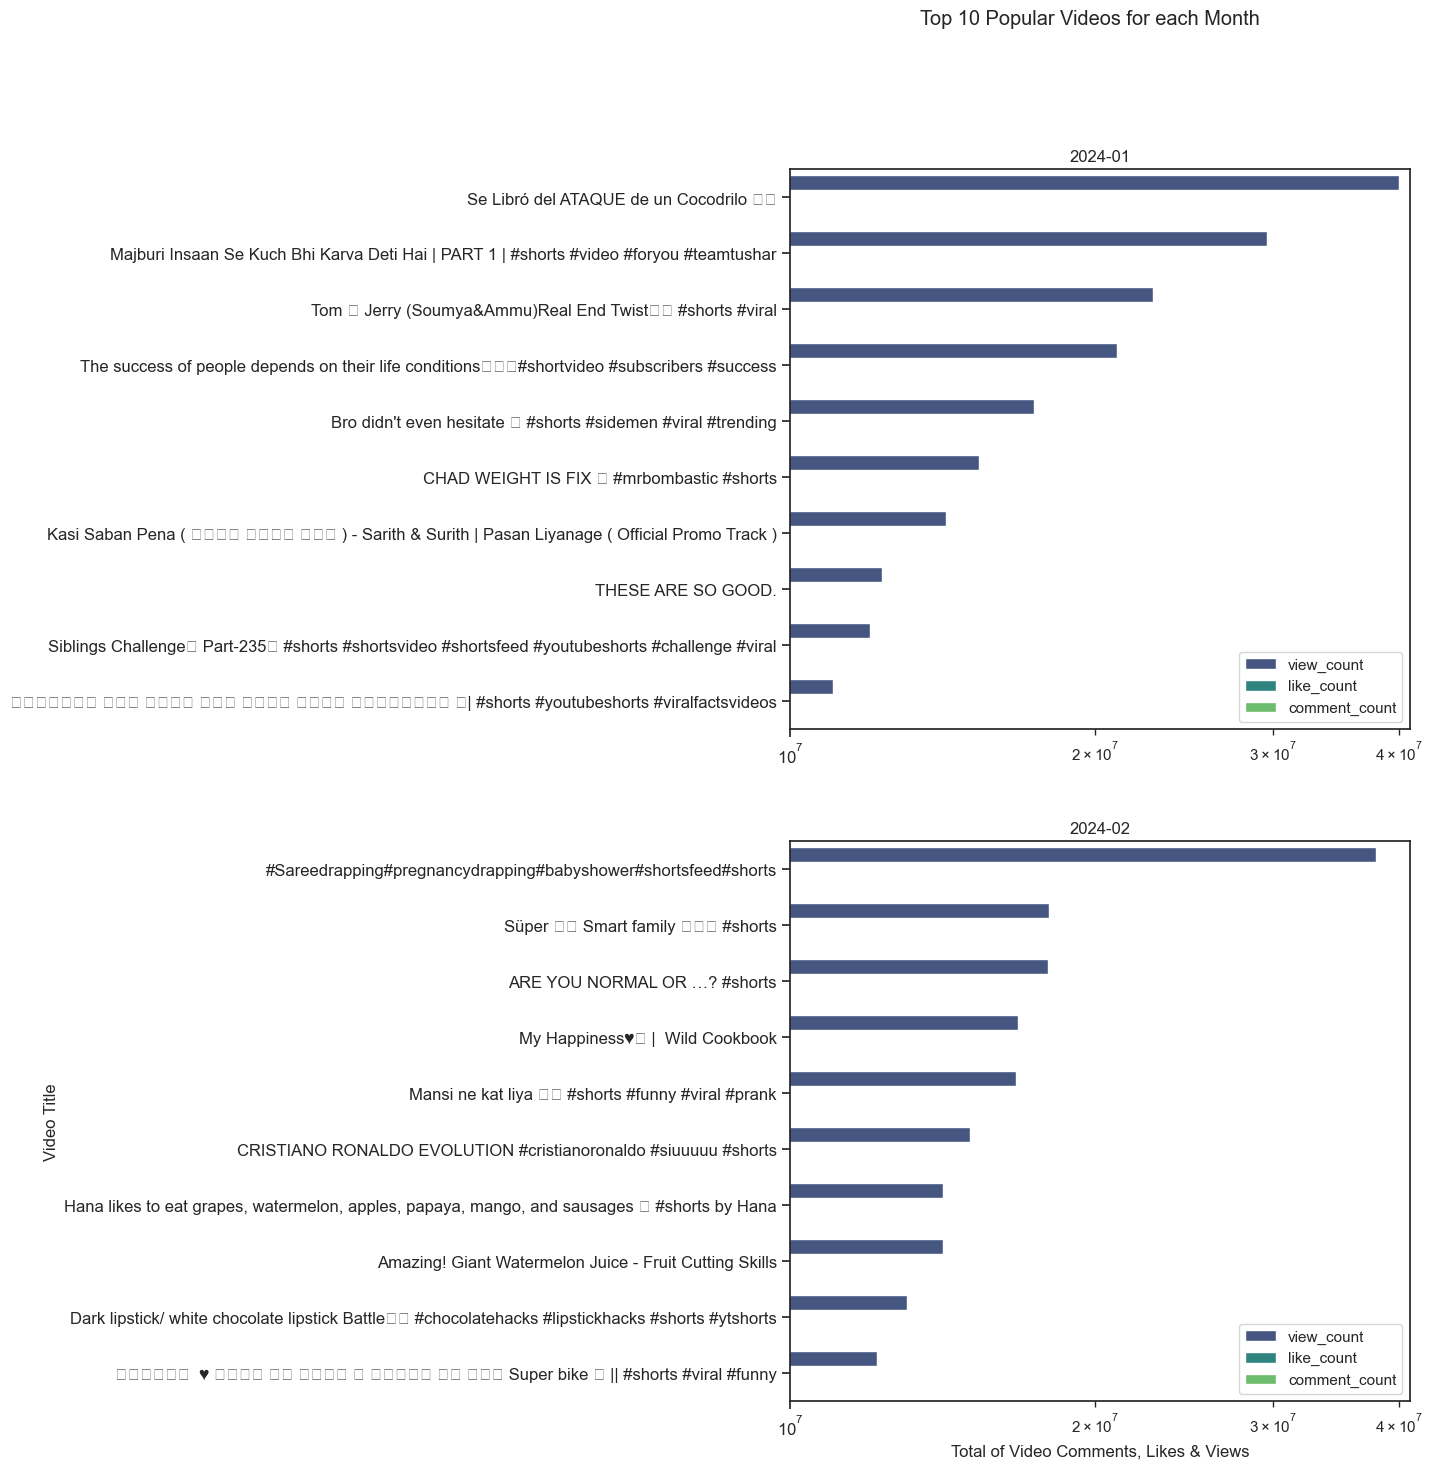

In [19]:
# Clustered Barplot of Popular Video each Month
df_month = df['publish_month'].unique().astype('str').tolist()
# plt.figure(figsize=(8,12))
sns.set_theme(style='ticks',rc={'figure.figsize':(8,16)})

fig, ax = plt.subplots(len(df_month), 1)
for i, title in enumerate(df_month):
  sns.barplot(data=dfG_MTVLC_melttitle[dfG_MTVLC_melttitle['publish_month']==(title)],
              ax=ax[i],
              x='value' , y='title', hue='variable',
              palette='viridis' )
  ax[i].set_title(title)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].tick_params(axis='both', labelsize=12)
  ax[i].set_xlim(1e7,4.1e7)
  ax[i].set_xscale('log')

  ax[i].legend()

fig.suptitle('Top 10 Popular Videos for each Month')
plt.ylabel('Video Title')
plt.xlabel('Total of Video Comments, Likes & Views')
plt.show()